# Continut
## [0. Importul bibliotecilor si datelor](#0)
## [1. Explorarea datelor](#1)
## [2. Modelul Logistic Regression pentru două clase](#2)
## [3. Evaluarea performantelor modelului](#3)
## [4. Modelul Logistic Regression pentru clase multiple](#4)
### [4.1. Importul si explorarea datelor](#41)
### [4.2. Elaborarea modelului cu hiper-parametri ficși](#42)
### [4.3. Elaborarea modelului cu hiper-parametri reglabili](#43)

<a id='0'></a>
# 0. Importul bibliotecilor si datelor

In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importul fisierului cu date 'Social_Network_Ads_simple.csv' 
df = pd.read_csv('Social_Network_Ads_simple.csv', index_col=0)

<a id='1'></a>
# 1. Explorarea datelor

In [3]:
# vizualziarea prmelor 5 linii
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# vizualizarea descrierii statistice a datelor din df
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
# vizualizarea numarul de valori in fiecare clasa a coloanei eticheta
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

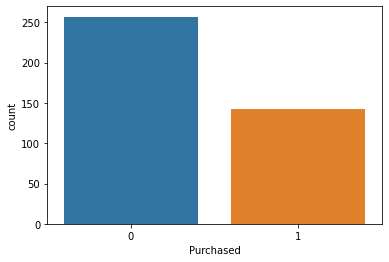

In [6]:
# vizualiazarea grafica a numarul de valori in fiecare clasa a coloanei eticheta (countplot)
sns.countplot(data=df, x='Purchased')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

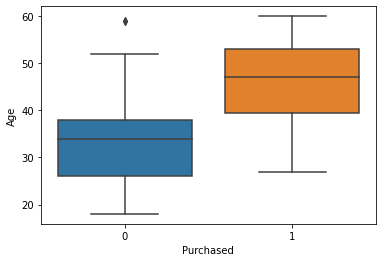

In [7]:
# vizualizarea distributiei valorilor etichetei in functie de categorii (boxplot)
sns.boxplot(data=df, x='Purchased', y ='Age')

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

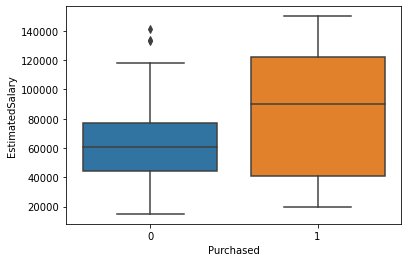

In [8]:
sns.boxplot(data=df, x='Purchased', y ='EstimatedSalary')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

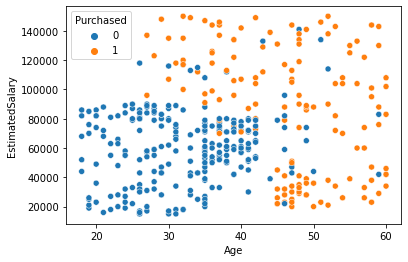

In [9]:
# vizualizarea depdendentei dintre caracteristici in functie de valoara etichetei
sns.scatterplot(data=df, x='Age', y='EstimatedSalary' , hue='Purchased')

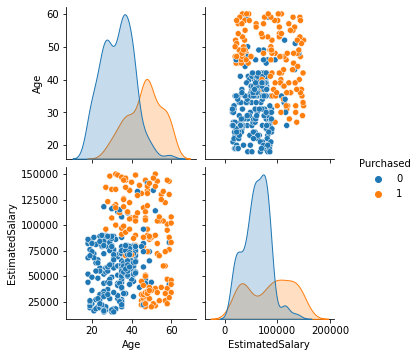

In [10]:
# vizualizarea distributiei caractersiticior in functie de valorile label (pairplot)
sns.pairplot(df, hue='Purchased');

<AxesSubplot:>

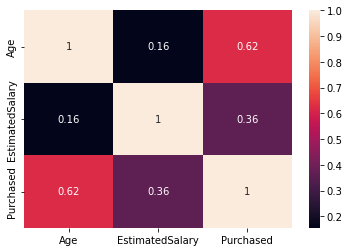

In [11]:
# vizualizarea corelatiei dintre coloane (heatmap)
sns.heatmap(df.corr(), annot=True)

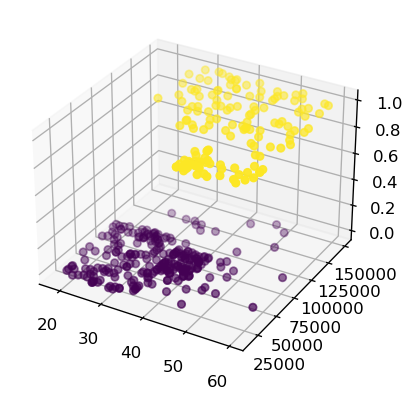

In [12]:
# vizualizarea depdendentelor dintre caracteristici in 3d
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(dpi=120)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Age'], df['EstimatedSalary'], df['Purchased'], c=df['Purchased'])

<a id='2'></a>
# 2. Modelul Logistic Regression pentru două clase

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
# crearea setului X si y
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [15]:
# crearea seturilor de train si de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [16]:
# Scalarea datelor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scalat = scaler.fit_transform(X_train)
X_test_scalat = scaler.transform(X_test)

In [17]:
# Importul si crearea modelului logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
# ajustarea modelului pe datele de training
model.fit(X_train_scalat, y_train)

LogisticRegression()

In [19]:
# vizualizarea coeficientilor
model.coef_

array([[2.25726942, 1.09106121]])

In [20]:
# realizarea predicitei
y_pred = model.predict(X_test_scalat)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [21]:
# realizarea predicitei cu afisarea probabilitatilor
model.predict_proba(X_test_scalat)

array([[0.94911602, 0.05088398],
       [0.99840695, 0.00159305],
       [0.72989709, 0.27010291],
       [0.84387981, 0.15612019],
       [0.98909027, 0.01090973],
       [0.67181652, 0.32818348],
       [0.62040685, 0.37959315],
       [0.83524605, 0.16475395],
       [0.03858341, 0.96141659],
       [0.31905161, 0.68094839],
       [0.01125716, 0.98874284],
       [0.98953937, 0.01046063],
       [0.68095271, 0.31904729],
       [0.40267297, 0.59732703],
       [0.99153717, 0.00846283],
       [0.10073678, 0.89926322],
       [0.90399168, 0.09600832],
       [0.71910983, 0.28089017],
       [0.9964196 , 0.0035804 ],
       [0.50792197, 0.49207803],
       [0.98437811, 0.01562189],
       [0.99838967, 0.00161033],
       [0.64029194, 0.35970806],
       [0.72546437, 0.27453563],
       [0.55586512, 0.44413488],
       [0.39730438, 0.60269562],
       [0.92701349, 0.07298651],
       [0.89436827, 0.10563173],
       [0.17387735, 0.82612265],
       [0.98094046, 0.01905954],
       [0.

<a id='3'></a>
# 3. Evaluarea performantelor modelului

In [22]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

In [23]:
# determinarea confusion matrix a modelului
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  2],
       [10, 22]], dtype=int64)

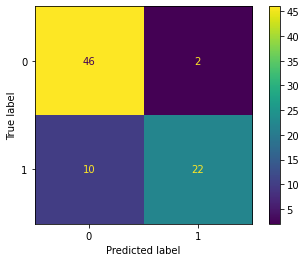

In [24]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [25]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.92      0.69      0.79        32

    accuracy                           0.85        80
   macro avg       0.87      0.82      0.84        80
weighted avg       0.86      0.85      0.85        80



In [26]:
# determinarea precision a modelului
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9166666666666666

In [27]:
# determinarea recall a modelului
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6875

In [28]:
# determinarea f1-score a modelului
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7857142857142857

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


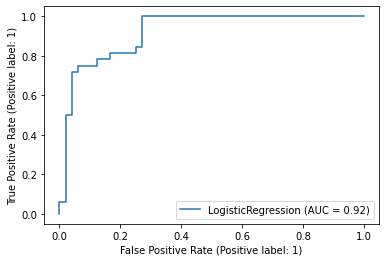

In [29]:
# vizualizarea ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test_scalat, y_test)

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


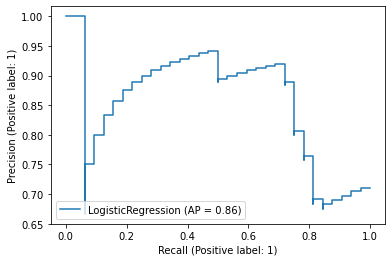

In [30]:
# vizualizarea curbei precision-recall
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test_scalat, y_test)

<a id='4'></a>
# 4. Modelul Logistic Regression pentru clase multiple

<a id='41'></a>
## 4.1. Importul si explorarea datelor

In [31]:
# Importul fisierului cu date 'glass.csv' 
df = pd.read_csv('glass.csv')

In [32]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [33]:
# vizualizarea informatie despre date (info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [34]:
# vizualizarea descrierii statistice a datelor (describe())
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [35]:
# vizualizarea numarului de clase din coloana label (value_counts())
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

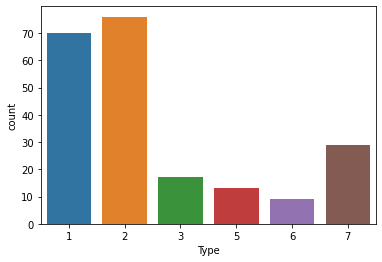

In [36]:
# vizualiazarea grafica a numarul de valori in fiecare clasa a coloanei eticheta (countplot)
sns.countplot(data=df, x='Type')

<AxesSubplot:xlabel='Na', ylabel='Si'>

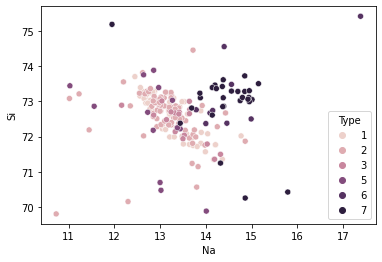

In [37]:
# vizualizarea gruparii claselor in functie de 2 calracteristici
sns.scatterplot(data=df, x='Na', y='Si' , hue='Type')

<AxesSubplot:>

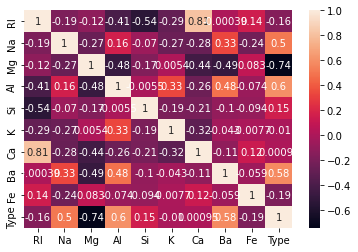

In [38]:
# vizualizarea corelatiei dintre coloane (heatmap)
sns.heatmap(df.corr(), annot=True)

In [39]:
# crearea setului X si y
X = df.drop('Type', axis=1)
y = df['Type']

In [40]:
# crearea seturilor de train si de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Scalarea datelor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scalat = scaler.fit_transform(X_train)
X_test_scalat = scaler.transform(X_test)

<a id='42'></a>
## 4.2. Elaborarea modelului cu hiper-parametri ficși

In [42]:
# Importul algoritmului logistic regression
from sklearn.linear_model import LogisticRegression
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [43]:
# crearea modelului logistic regression cu fixarea hiper-parametrilor
model = LogisticRegression(solver='saga', multi_class='multinomial', penalty='l1', C=120, max_iter=1000000)

In [44]:
# ajustarea modelului pe datele de training
model.fit(X_train_scalat, y_train)

LogisticRegression(C=120, max_iter=1000000, multi_class='multinomial',
                   penalty='l1', solver='saga')

In [45]:
# verificare coeficienti
model.coef_

array([[-0.92998191, -0.13403476,  4.19349056, -3.46154158,  0.34186487,
         2.93910204,  2.64199962,  3.73482097,  1.37186607],
       [-0.6170774 , -2.9982943 , -3.13227552, -2.54546048, -3.34919913,
         0.23370464, -2.98482716,  0.02692187,  1.63011677],
       [-9.5937406 , -2.89126611,  2.48040172, -4.28310432, -6.67201353,
        -1.35570544,  5.7760277 , -2.39933841,  1.60961223],
       [ 2.67556249, -1.42300991, -1.96609903,  3.38396761,  1.07044603,
         1.447254  , -1.524575  ,  0.31096787,  0.97574728],
       [-0.71372378,  3.08345844,  0.35728512,  1.37343246,  1.81556143,
        -6.78127017,  1.09334325, -2.43625922, -4.7334603 ],
       [ 9.3980833 ,  5.05992156, -1.89289863,  5.52376064,  6.23786242,
         2.83117186, -5.097651  ,  0.30056604, -1.55167916]])

In [46]:
# realizarea predicitei pe datele de test
y_pred = model.predict(X_test_scalat)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 1, 1, 3, 6, 5, 1, 2, 6, 5, 6, 3, 2, 6, 2, 7,
       7, 7, 1, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 6, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 5, 1, 2, 2, 3, 7, 3],
      dtype=int64)

In [47]:
# probabilitatea fiecarei valori din setul de test de a apartine unei clase 
y_pred_prob = model.predict_proba(X_test_scalat)
y_pred_prob

array([[6.41407658e-01, 3.50785502e-01, 7.25875632e-03, 5.47311886e-04,
        5.61486398e-08, 7.16247074e-07],
       [2.22734667e-13, 9.32513440e-10, 1.64372208e-18, 2.52316838e-06,
        5.08601295e-05, 9.99946616e-01],
       [7.74567094e-01, 1.26364777e-01, 9.90674913e-02, 6.37485369e-07,
        4.43813766e-10, 1.18834066e-11],
       [1.14712731e-11, 8.15695755e-08, 1.59072301e-15, 5.80989351e-05,
        3.87991406e-05, 9.99903020e-01],
       [4.76384079e-02, 9.05021606e-01, 3.64968741e-02, 8.40595041e-03,
        5.25818919e-04, 1.91134233e-03],
       [1.90257620e-01, 7.68877387e-01, 2.37289636e-02, 1.71310534e-02,
        4.97603376e-06, 1.14235750e-10],
       [7.84377846e-01, 2.13713242e-01, 1.50468923e-03, 3.85761474e-04,
        1.24328290e-05, 6.02902466e-06],
       [4.67178062e-01, 4.54870348e-01, 5.48166802e-02, 2.31583802e-03,
        2.07275046e-02, 9.15676300e-05],
       [5.29516586e-01, 4.50427816e-01, 1.71373574e-02, 2.82579143e-03,
        5.52339203e-05, 

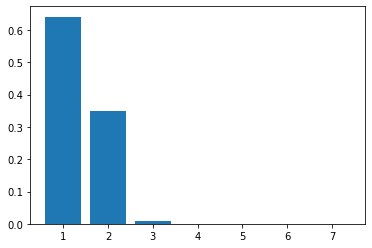

In [48]:
# vizualizarea probabilitatilor primei valori din setul de test de a apartine unei din cele 7 clase
plt.bar([1,2,3,5,6,7],y_pred_prob[0]);

In [49]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.676923076923077

In [50]:
# determinarea confusion matrix a modelului
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[13,  4,  2,  0,  0,  0],
       [ 5, 15,  2,  0,  1,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  1,  1,  4,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

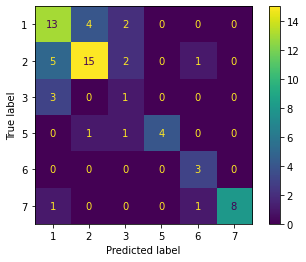

In [51]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot();

In [52]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.68      0.63        19
           2       0.75      0.65      0.70        23
           3       0.17      0.25      0.20         4
           5       1.00      0.67      0.80         6
           6       0.60      1.00      0.75         3
           7       1.00      0.80      0.89        10

    accuracy                           0.68        65
   macro avg       0.68      0.68      0.66        65
weighted avg       0.72      0.68      0.69        65



<a id='43'></a>
## 4.3. Elaborarea modelului cu hiper-parametri reglabili

In [53]:
# Importul algoritmului logistic regression cu
from sklearn.linear_model import LogisticRegression

In [54]:
# crearea modelului logistic regression de baza
base_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000000)

In [55]:
# crearea unor liste cu valorile hiperparametrilor ce vor fi variati (verificare documentatie)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C=np.logspace(0, 10, 20)

In [56]:
# crearea unui dictionar cu hiperparametrii ce vor fi modificati
param_grid = {'penalty': penalty,
              'l1_ratio':l1_ratio,
              'C': C}

In [57]:
# crearea modelului grid
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(base_model, param_grid=param_grid, cv=5, verbose=2)

In [58]:
# ajustarea modelului pe datele de training (va dura ceva timp)
grid_model.fit(X_train_scalat, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END ......C=1.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anacond

[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, 

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=11.28837891684689, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=37.926901907322495, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=127.42749857031335, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=428.1332398719391, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=1438.449888287663, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=1438.449888287663, l1_ratio=1.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=4832.930238571752, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=4832.930238571752, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=16237.76739188721, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=16237.76739188721, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=54555.947811685146, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=54555.947811685146, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=183298.07108324338, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=183298.07108324338, l1_ratio=1.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=1.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=2069138.0811147902, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=2069138.0811147902, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=6951927.961775606, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.2s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.2s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=6951927.961775606, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=23357214.690901212, l1_ratio=0.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=23357214.690901212, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=78475997.03514607, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=78475997.03514607, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=263665089.87303555, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=263665089.87303555, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=885866790.4100832, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ......C=885866790.4100832, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l2; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l2; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=0.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END .....C=2976351441.6313133, l1_ratio=1.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s


C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000000,
                                          multi_class='multinomial',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [59]:
# verificare celor mai buni hiperparametri
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [60]:
# realizarea predicitei pe datele de test
y_pred = grid_model.predict(X_test_scalat)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 1, 2, 2, 6, 2, 1, 2, 6, 5, 6, 1, 2, 6, 2, 7,
       7, 7, 2, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 6, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3, 7, 3],
      dtype=int64)

In [61]:
np.array(y_test)

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5],
      dtype=int64)

In [62]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6923076923076923

In [63]:
# determinarea confusion matrix a modelului
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  4,  1,  0,  0,  0],
       [ 5, 17,  0,  0,  1,  0],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  3,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

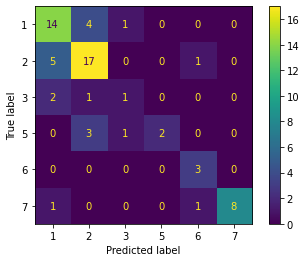

In [64]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot();

In [65]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.74      0.68        19
           2       0.68      0.74      0.71        23
           3       0.33      0.25      0.29         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.80      0.89        10

    accuracy                           0.69        65
   macro avg       0.71      0.64      0.64        65
weighted avg       0.72      0.69      0.69        65

